In [115]:
from langgraph.graph import StateGraph, START, END
from typing_extensions import TypedDict
from typing import Literal

In [116]:
class State(TypedDict):
    seed: int


graph_builder = StateGraph(State)

In [117]:
def node_one(state: State):
    print("node_one ->", state)
    return {}


def node_two(state: State):
    print("node_two ->", state)
    return {}


def node_three(state: State):
    print("node_three ->", state)
    return {}


def node_four(state: State):
    print("node_four ->", state)
    return {}

In [118]:
graph_builder.add_node("node_one", node_one)
graph_builder.add_node("node_two", node_two)
graph_builder.add_node("node_three", node_three)
graph_builder.add_node("node_four", node_four)


# def decide_path(state: State) -> Literal["node_three", "node_four"]:
#     if state["seed"] % 2 == 0:
#         return "node_three"
#     else:
#         return "node_four"


def decide_path(state: State):
    return state["seed"] % 2 == 0


graph_builder.add_conditional_edges(
    START, decide_path, {True: "node_one", False: "node_two", "hello": END}
)
graph_builder.add_edge("node_one", "node_two")
graph_builder.add_conditional_edges(
    "node_two", decide_path, {True: "node_three", False: "node_four", "hello": END}
)
graph_builder.add_edge("node_three", END)
graph_builder.add_edge("node_four", END)

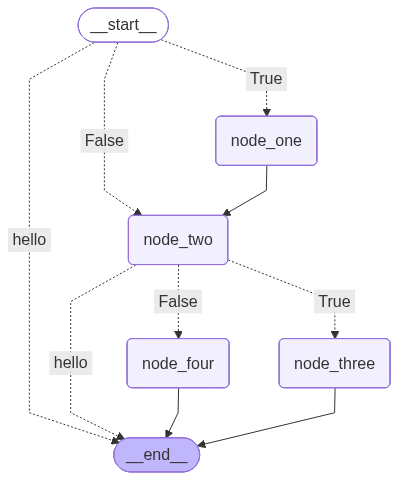

In [121]:
graph = graph_builder.compile()

graph